# Importation

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## Download the Dataset

In [60]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dnkumars/cybersecurity-intrusion-detection-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'cybersecurity-intrusion-detection-dataset' dataset.
Path to dataset files: /kaggle/input/cybersecurity-intrusion-detection-dataset


In [61]:
try:
  df = pd.read_csv('/kaggle/input/cybersecurity-intrusion-detection-dataset/cybersecurity_intrusion_data.csv')
  display(df.head())
except FileNotFoundError:
  print("Dataset file not found. Please check the exact filename and path.")


,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


# Data Exploration

In [62]:
print("\nData types:")
display(df.dtypes)

print("\nDescriptive statistics:")
display(df.describe())


Data types:


,0
session_id,object
network_packet_size,int64
protocol_type,object
login_attempts,int64
session_duration,float64
encryption_used,object
ip_reputation_score,float64
failed_logins,int64
browser_type,object
unusual_time_access,int64



Descriptive statistics:


,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


###  Check for missing values

In [64]:
print("Missing values per column:")
display(df.isnull().sum())

Missing values per column:


,0
session_id,0
network_packet_size,0
protocol_type,0
login_attempts,0
session_duration,0
encryption_used,1966
ip_reputation_score,0
failed_logins,0
browser_type,0
unusual_time_access,0


## Corrolation Matrix

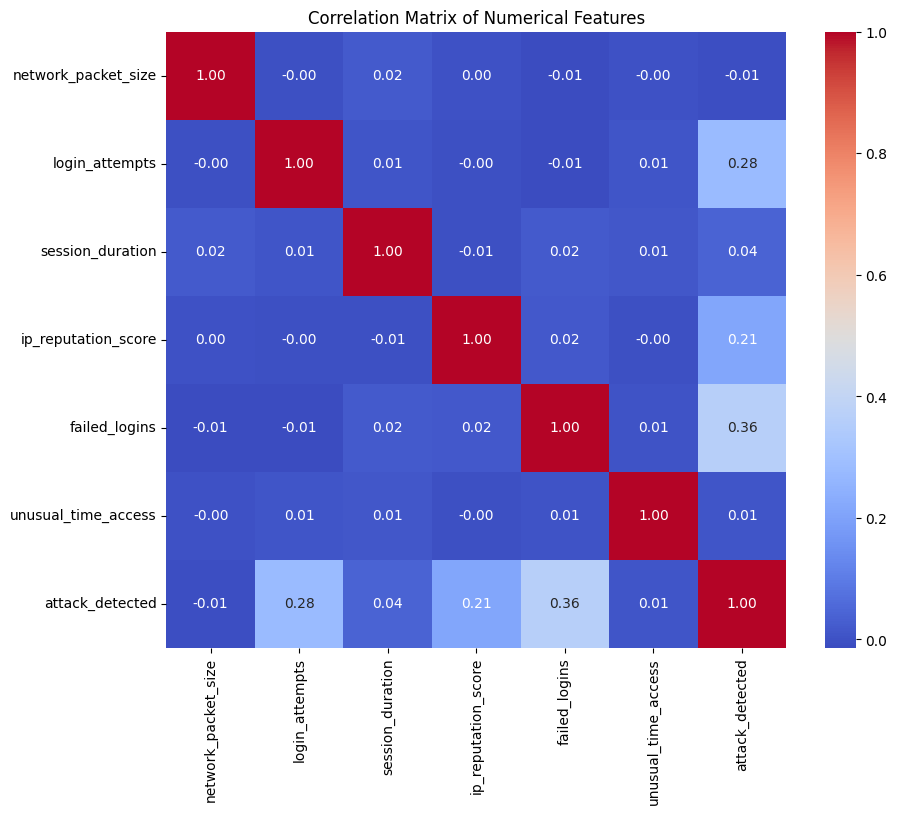

In [65]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('correlation_matrix.png') # Save the plot
plt.show()

#Data Preparation

### Data encoding


In [66]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('session_id')

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df_encoded.head())

,session_id,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected,protocol_type_TCP,protocol_type_UDP,encryption_used_DES,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown
0,SID_00001,599,4,492.983263,0.606818,1,0,1,True,False,True,True,False,False,False
1,SID_00002,472,3,1557.996461,0.301569,0,0,0,True,False,True,False,True,False,False
2,SID_00003,629,3,75.044262,0.739164,2,0,1,True,False,True,False,False,False,False
3,SID_00004,804,4,601.248835,0.123267,0,0,1,False,True,True,False,False,False,True
4,SID_00005,453,5,532.540888,0.054874,1,0,0,True,False,False,False,True,False,False


## Feature selection


In [67]:
X = df_encoded.drop(['session_id', 'attack_detected'], axis=1)
y = df_encoded['attack_detected']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
display(X.head())
display(y.head())

Features (X) shape: (9537, 13)
Target (y) shape: (9537,)


,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,protocol_type_TCP,protocol_type_UDP,encryption_used_DES,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown
0,599,4,492.983263,0.606818,1,0,True,False,True,True,False,False,False
1,472,3,1557.996461,0.301569,0,0,True,False,True,False,True,False,False
2,629,3,75.044262,0.739164,2,0,True,False,True,False,False,False,False
3,804,4,601.248835,0.123267,0,0,False,True,True,False,False,False,True
4,453,5,532.540888,0.054874,1,0,True,False,False,False,True,False,False


,attack_detected
0,1
1,0
2,1
3,1
4,0


## Data splitting

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7629, 13)
X_test shape: (1908, 13)
y_train shape: (7629,)
y_test shape: (1908,)


#Model selection and training


## Logistic Regression Grid Search:

### Training

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'solver': ['liblinear', 'lbfgs'],
                  'max_iter': [100, 200, 500, 1000]}

# Initialize the Logistic Regression classifier
log_reg_model = LogisticRegression(random_state=42)

# Initialize GridSearchCV
log_reg_classifier = GridSearchCV(log_reg_model, log_reg_params, cv=5, scoring='recall')

# Fit GridSearchCV to the training data
log_reg_classifier.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found by GridSearchCV for Logistic Regression:")
display(log_reg_classifier.best_params_)
print("\nBest recall score found by GridSearchCV for Logistic Regression:")
display(log_reg_classifier.best_score_)

# Train the Logistic Regression model with the best parameters
best_log_reg_model = LogisticRegression(**log_reg_classifier.best_params_, random_state=42)
best_log_reg_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters found by GridSearchCV for Logistic Regression:


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'C': 10, 'max_iter': 1000, 'solver': 'lbfgs'}


Best recall score found by GridSearchCV for Logistic Regression:


np.float64(0.6674577666117993)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, max_iter=1000, random_state=42)

### Evaluation of Tuned Logistic Regression

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the tuned Logistic Regression model
log_reg_pred = best_log_reg_model.predict(X_test)

accuracy = accuracy_score(y_test, log_reg_pred)
precision = precision_score(y_test, log_reg_pred)
recall = recall_score(y_test, log_reg_pred)
f1 = f1_score(y_test, log_reg_pred)

print(f"Logistic Regression Accuracy (with tuned hyperparameters): {accuracy:.4f}")
print(f"Logistic Regression Precision (with tuned hyperparameters): {precision:.4f}")
print(f"Logistic Regression Recall (with tuned hyperparameters): {recall:.4f}")
print(f"Logistic Regression F1-score (with tuned hyperparameters): {f1:.4f}")

Logistic Regression Accuracy (with tuned hyperparameters): 0.7479
Logistic Regression Precision (with tuned hyperparameters): 0.7471
Logistic Regression Recall (with tuned hyperparameters): 0.6721
Logistic Regression F1-score (with tuned hyperparameters): 0.7076


### Confusion Matrix

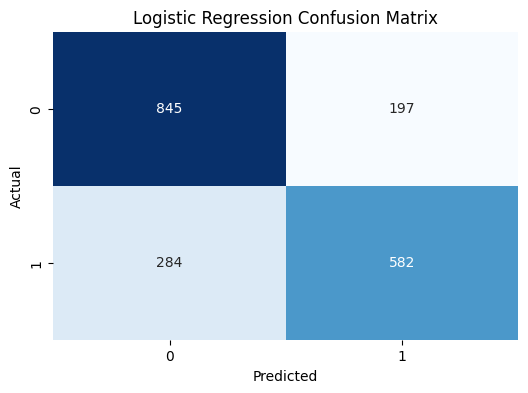

In [71]:
log_reg_cm = confusion_matrix(y_test, log_reg_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('logistic_regression_confusion_matrix.png') # Save the plot
plt.show()

### Performance Metrics for Tuned Logistic Regression

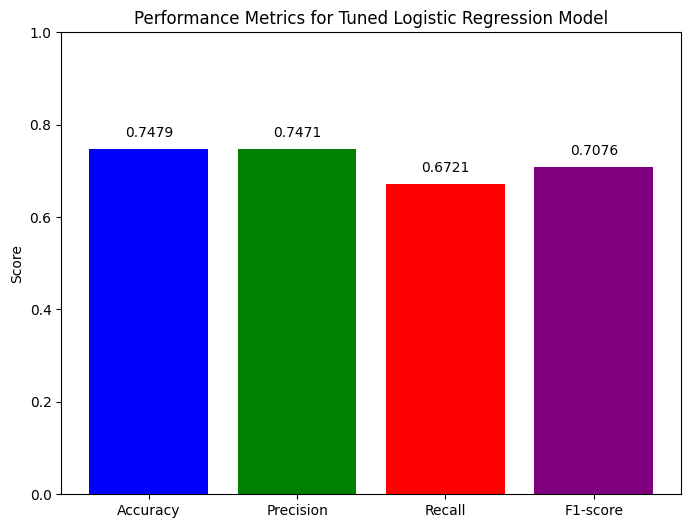

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming log_reg_pred and y_test are available

accuracy = accuracy_score(y_test, log_reg_pred)
precision = precision_score(y_test, log_reg_pred)
recall = recall_score(y_test, log_reg_pred)
f1 = f1_score(y_test, log_reg_pred)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, scores, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Score')
plt.title('Performance Metrics for Tuned Logistic Regression Model')
plt.ylim(0, 1) # Metrics are between 0 and 1

# Add numbers to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 4), ha='center', va='bottom')

plt.savefig('logistic_regression_performance_metrics.png') # Save the plot
plt.show()

## KNN with Grid Search:

### training

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
knn_params = {'n_neighbors': range(1, 21)} # Testing a range of neighbor values

# Initialize the KNN classifier
knn_model = KNeighborsClassifier()

# Initialize GridSearchCV
# Using recall as the scoring metric
knn_classifier = GridSearchCV(knn_model, knn_params, cv=5, scoring='recall')

# Fit GridSearchCV to the training data
knn_classifier.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found by GridSearchCV for KNN:")
display(knn_classifier.best_params_)
print("\nBest recall score found by GridSearchCV for KNN:")
display(knn_classifier.best_score_)

# Train the KNN model with the best parameters
best_knn_model = KNeighborsClassifier(**knn_classifier.best_params_)
best_knn_model.fit(X_train, y_train)




Best parameters found by GridSearchCV for KNN:


{'n_neighbors': 1}


Best recall score found by GridSearchCV for KNN:


np.float64(0.4511431170406307)

KNeighborsClassifier(n_neighbors=1)

### Evaluation

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the tuned KNN model
knn_pred = best_knn_model.predict(X_test)

accuracy = accuracy_score(y_test, knn_pred)
precision = precision_score(y_test, knn_pred)
recall = recall_score(y_test, knn_pred)
f1 = f1_score(y_test, knn_pred)

print(f"KNN Accuracy (with tuned hyperparameters): {accuracy:.4f}")
print(f"KNN Precision (with tuned hyperparameters): {precision:.4f}")
print(f"KNN Recall (with tuned hyperparameters): {recall:.4f}")
print(f"KNN F1-score (with tuned hyperparameters): {f1:.4f}")

KNN Accuracy (with tuned hyperparameters): 0.5157
KNN Precision (with tuned hyperparameters): 0.4651
KNN Recall (with tuned hyperparameters): 0.4457
KNN F1-score (with tuned hyperparameters): 0.4552


### Performance Metrics for Tuned KNN

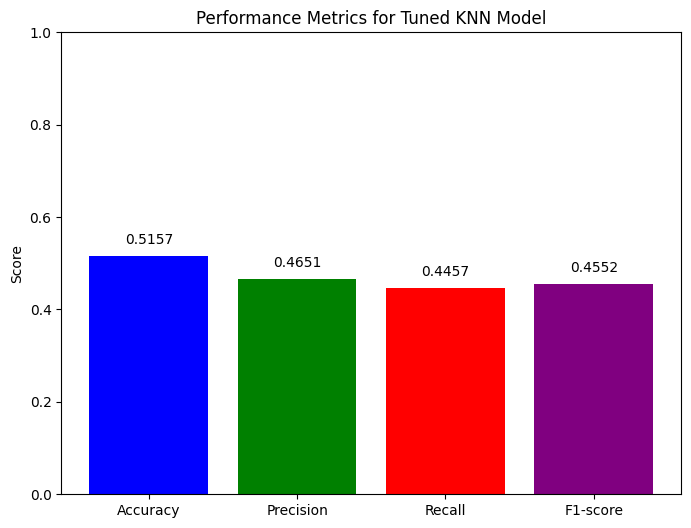

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming knn_pred and y_test are available

accuracy = accuracy_score(y_test, knn_pred)
precision = precision_score(y_test, knn_pred)
recall = recall_score(y_test, knn_pred)
f1 = f1_score(y_test, knn_pred)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, scores, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Score')
plt.title('Performance Metrics for Tuned KNN Model')
plt.ylim(0, 1) # Metrics are between 0 and 1

# Add numbers to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 4), ha='center', va='bottom')

plt.savefig('knn_performance_metrics.png') # Save the plot
plt.show()

### Confusion Matrix

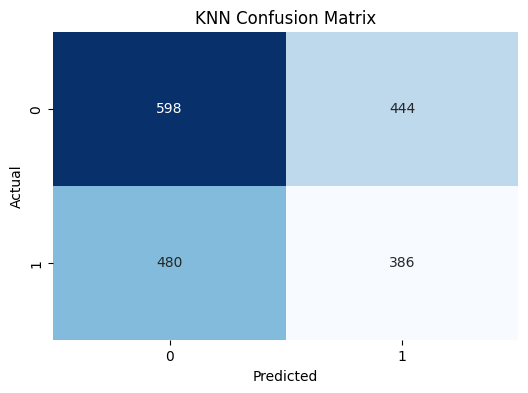

In [76]:
knn_cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('knn_confusion_matrix.png') # Save the plot
plt.show()

## SVC:

### Training:

In [77]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [78]:
svm_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, svm_pred)
precision = precision_score(y_test, svm_pred)
recall = recall_score(y_test, svm_pred)
f1 = f1_score(y_test, svm_pred)

print(f"SVM Accuracy: {accuracy:.4f}")
print(f"SVM Precision: {precision:.4f}")
print(f"SVM Recall: {recall:.4f}")
print(f"SVM F1-score: {f1:.4f}")

SVM Accuracy: 0.5519
SVM Precision: 0.6410
SVM Recall: 0.0289
SVM F1-score: 0.0552


### Performance Metrics for Tuned SVM

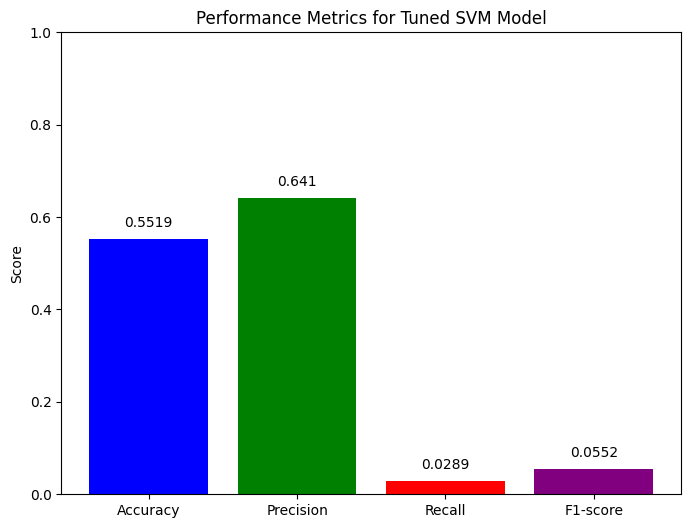

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming svm_pred and y_test are available

accuracy = accuracy_score(y_test, svm_pred)
precision = precision_score(y_test, svm_pred)
recall = recall_score(y_test, svm_pred)
f1 = f1_score(y_test, svm_pred)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, scores, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Score')
plt.title('Performance Metrics for Tuned SVM Model')
plt.ylim(0, 1) # Metrics are between 0 and 1

# Add numbers to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 4), ha='center', va='bottom')

plt.savefig('svm_performance_metrics.png') # Save the plot
plt.show()

### Confusion Matrix

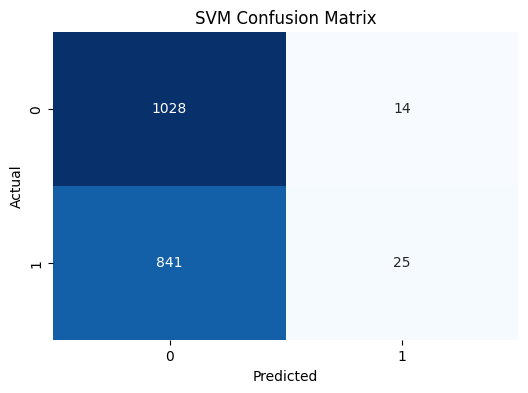

In [80]:
svm_cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('svm_confusion_matrix.png') # Save the plot
plt.show()

## Decision Tree:


### Training

Train Decision Tree with default parameters

In [81]:
from sklearn.tree import DecisionTreeClassifier


dt_model_default = DecisionTreeClassifier(random_state=42)
dt_model_default.fit(X_train, y_train)

print("Default Decision Tree model trained.")

Default Decision Tree model trained.


Train Decision fine tuned

In [82]:
from sklearn.model_selection import GridSearchCV

tree_params = {'max_depth': range(1, 10),
               'max_features': range(3, X_train.shape[1]),
               'criterion': ['gini', 'entropy']}

dt_model = DecisionTreeClassifier(random_state=42)

tree_classifier = GridSearchCV(dt_model, tree_params, cv=5, scoring='recall')

tree_classifier.fit(X_train, y_train)

print("Best parameters found by GridSearchCV:")
display(tree_classifier.best_params_)
print("\nBest recall score found by GridSearchCV:")
display(tree_classifier.best_score_)


best_dt_model = DecisionTreeClassifier(**tree_classifier.best_params_, random_state=42)
best_dt_model.fit(X_train, y_train)

# Make predictions with the best model
dt_pred = best_dt_model.predict(X_test)

Best parameters found by GridSearchCV:


{'criterion': 'gini', 'max_depth': 9, 'max_features': 12}


Best recall score found by GridSearchCV:


np.float64(0.7648704842761846)

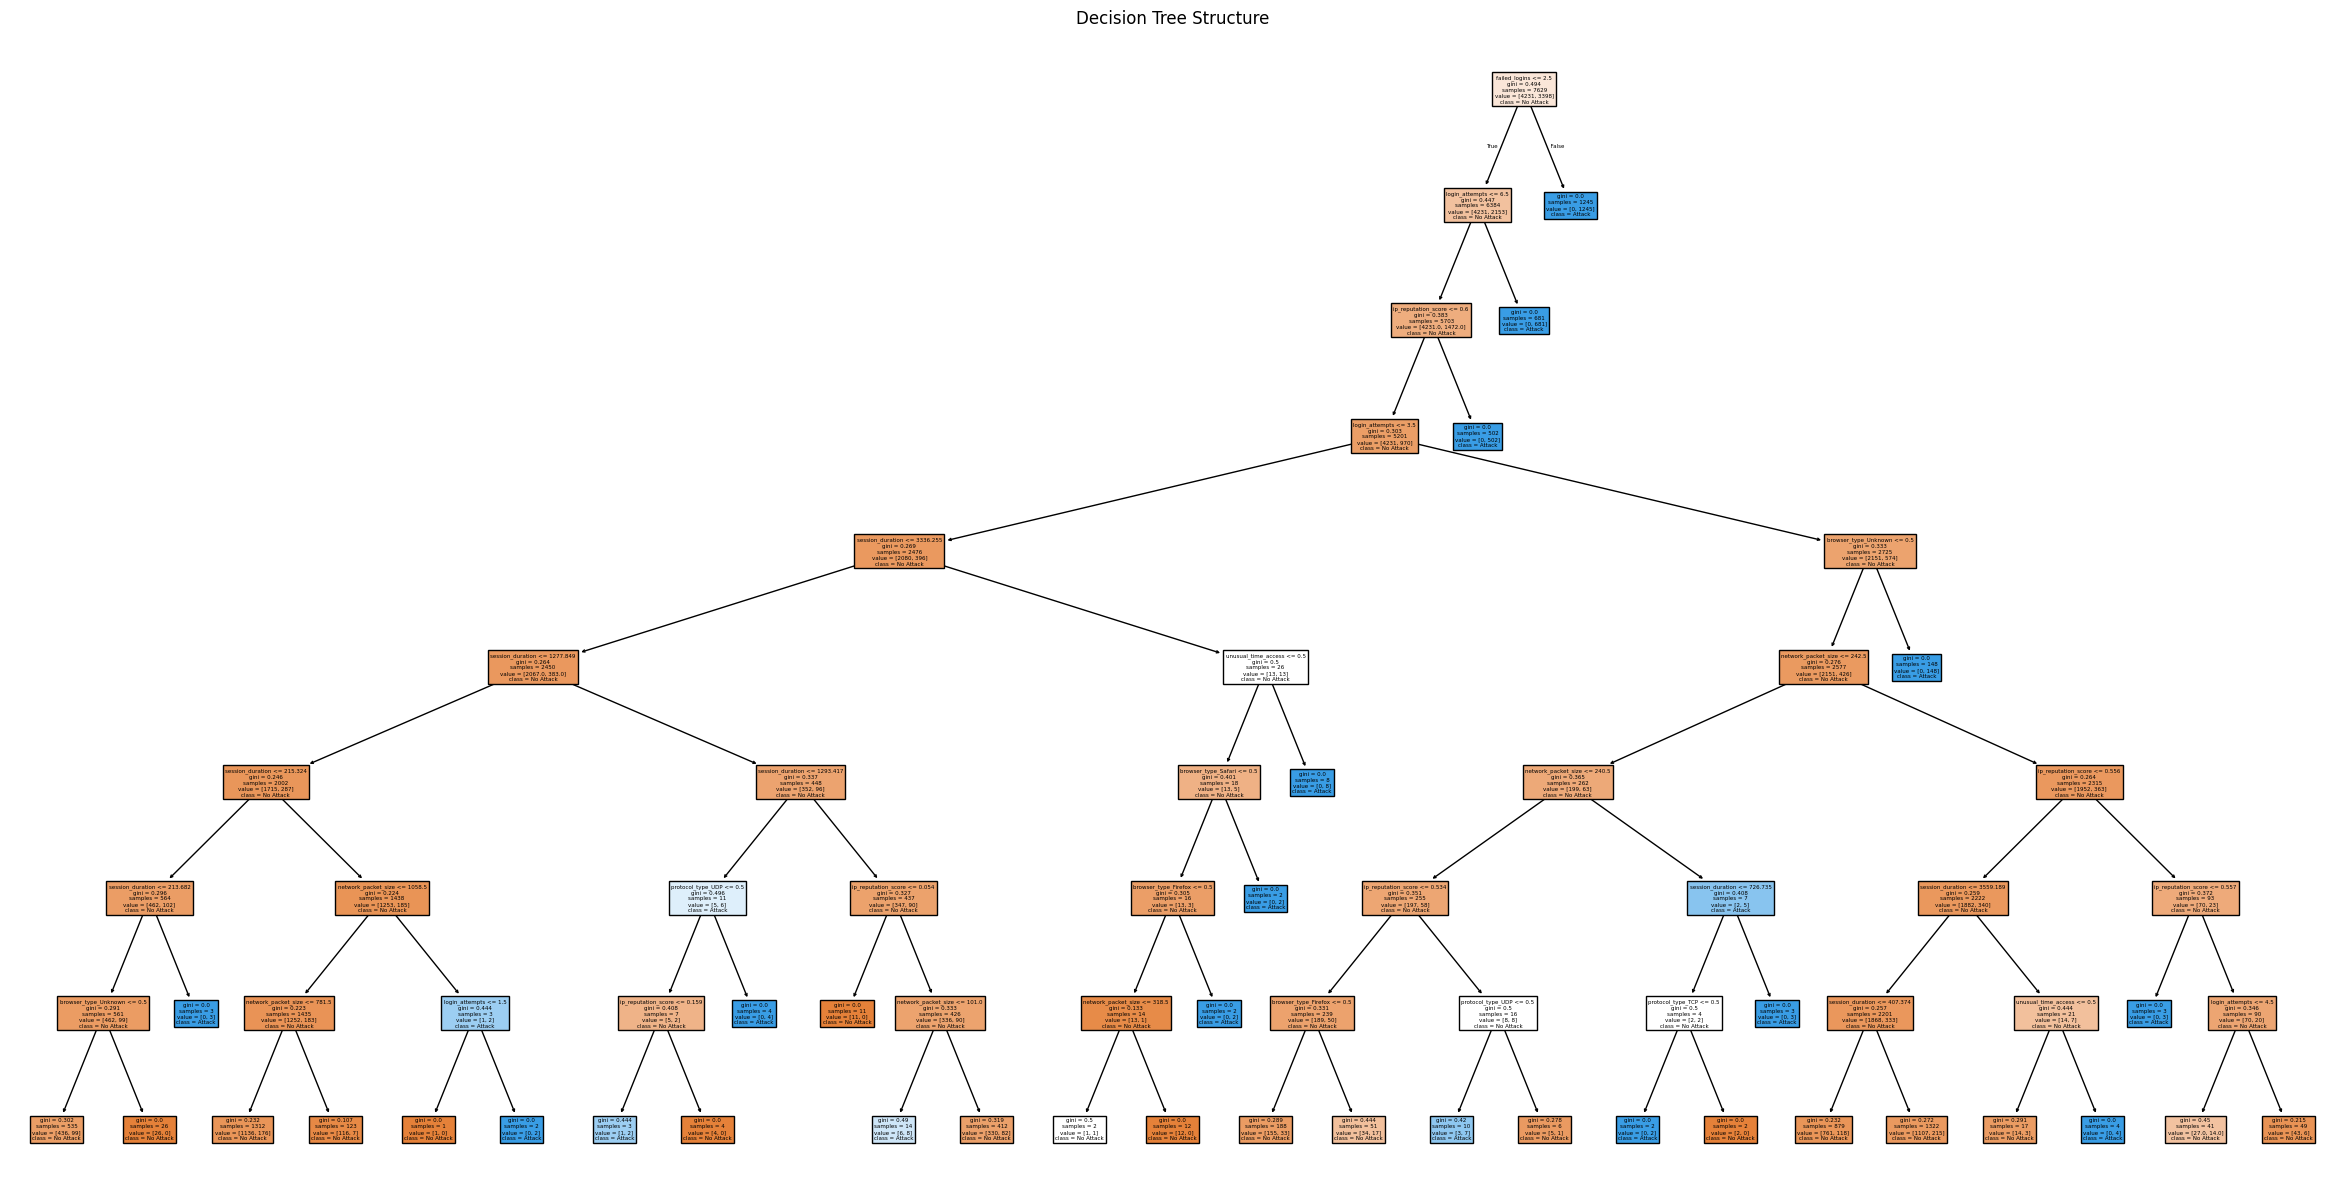

In [83]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 15))
plot_tree(best_dt_model, feature_names=X_train.columns.tolist(), class_names=['No Attack', 'Attack'], filled=True)
plt.title('Decision Tree Structure')
plt.show()

### Evaluation

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the default Decision Tree model
dt_pred_default = dt_model_default.predict(X_test)

accuracy_default = accuracy_score(y_test, dt_pred_default)
precision_default = precision_score(y_test, dt_pred_default)
recall_default = recall_score(y_test, dt_pred_default)
f1_default = f1_score(y_test, dt_pred_default)

print("Performance of Default Decision Tree Model:")
print(f"Accuracy: {accuracy_default:.4f}")
print(f"Precision: {precision_default:.4f}")
print(f"Recall: {recall_default:.4f}")
print(f"F1-score: {f1_default:.4f}")

# Evaluate the Decision Tree model with tuned hyperparameters
dt_pred_tuned = best_dt_model.predict(X_test)

accuracy_tuned = accuracy_score(y_test, dt_pred_tuned)
precision_tuned = precision_score(y_test, dt_pred_tuned)
recall_tuned = recall_score(y_test, dt_pred_tuned)
f1_tuned = f1_score(y_test, dt_pred_tuned)

print("\nPerformance of Tuned Decision Tree Model:")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")
print(f"F1-score: {f1_tuned:.4f}")

# Compare the performance
print("\nComparison of Default and Tuned Decision Tree Models:")
print(f"Accuracy improvement: {accuracy_tuned - accuracy_default:.4f}")
print(f"Precision improvement: {precision_tuned - precision_default:.4f}")
print(f"Recall improvement: {recall_tuned - recall_default:.4f}")
print(f"F1-score improvement: {f1_tuned - f1_default:.4f}")

Performance of Default Decision Tree Model:
Accuracy: 0.8239
Precision: 0.8011
Recall: 0.8141
F1-score: 0.8076

Performance of Tuned Decision Tree Model:
Accuracy: 0.8884
Precision: 0.9866
Recall: 0.7644
F1-score: 0.8614

Comparison of Default and Tuned Decision Tree Models:
Accuracy improvement: 0.0645
Precision improvement: 0.1855
Recall improvement: -0.0497
F1-score improvement: 0.0539


## Perfomarnce

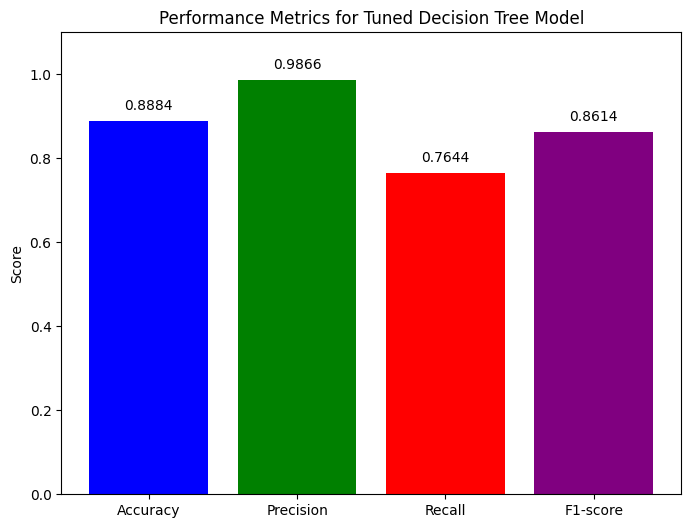

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming dt_pred, y_test are available and contain predictions and actual labels for the tuned Decision Tree

accuracy = accuracy_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred)
recall = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, scores, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Score')
plt.title('Performance Metrics for Tuned Decision Tree Model')
plt.ylim(0, 1.1) # Metrics are between 0 and 1

# Add numbers to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 4), ha='center', va='bottom')

plt.savefig('decision_tree_performance_metrics.png') # Save the plot
plt.show()

### Confusion Matrix

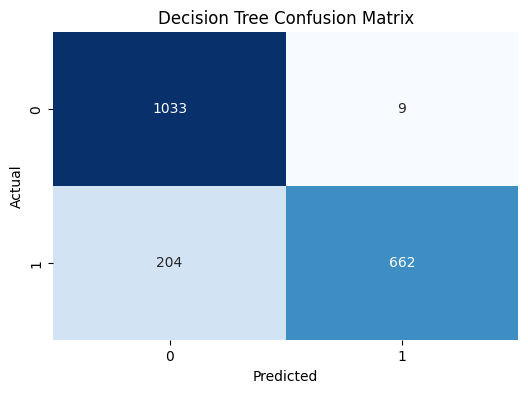

In [86]:
dt_cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('decision_tree_confusion_matrix.png') # Save the plot
plt.show()

## Random Forest


### Training

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
rf_params = {'n_estimators': [50, 100, 200],
               'max_depth': [None, 10, 20, 30],
               'min_samples_split': [2, 5, 10]}

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Using recall as the scoring metric
rf_classifier = GridSearchCV(rf_model, rf_params, cv=5, scoring='recall')

# Fit GridSearchCV to the training data
rf_classifier.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found by GridSearchCV for Random Forest:")
display(rf_classifier.best_params_)
print("\nBest recall score found by GridSearchCV for Random Forest:")
display(rf_classifier.best_score_)

# Train the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(**rf_classifier.best_params_, random_state=42)
best_rf_model.fit(X_train, y_train)

Best parameters found by GridSearchCV for Random Forest:


{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


Best recall score found by GridSearchCV for Random Forest:


np.float64(0.7639868318461405)

RandomForestClassifier(n_estimators=200, random_state=42)

### Evaluation

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the tuned Random Forest model
rf_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)

print(f"Random Forest Accuracy (with tuned hyperparameters): {accuracy:.4f}")
print(f"Random Forest Precision (with tuned hyperparameters): {precision:.4f}")
print(f"Random Forest Recall (with tuned hyperparameters): {recall:.4f}")
print(f"Random Forest F1-score (with tuned hyperparameters): {f1:.4f}")

Random Forest Accuracy (with tuned hyperparameters): 0.8952
Random Forest Precision (with tuned hyperparameters): 0.9941
Random Forest Recall (with tuned hyperparameters): 0.7737
Random Forest F1-score (with tuned hyperparameters): 0.8701


### Performance Metrics for Tuned Random Forest

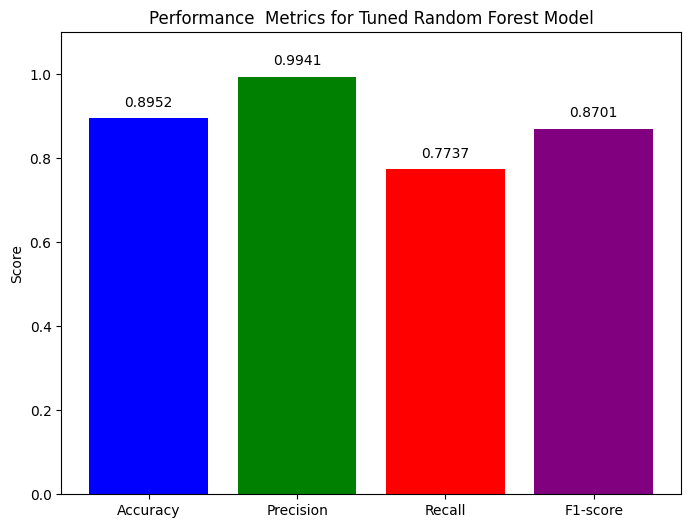

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming rf_pred and y_test are available

accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, scores, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Score')
plt.title('Performance  Metrics for Tuned Random Forest Model')
plt.ylim(0, 1.1) # Metrics are between 0 and 1

# Add numbers to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 4), ha='center', va='bottom')

plt.savefig('random_forest_performance_metrics.png') # Save the plot
plt.show()

### Confusion Matrix

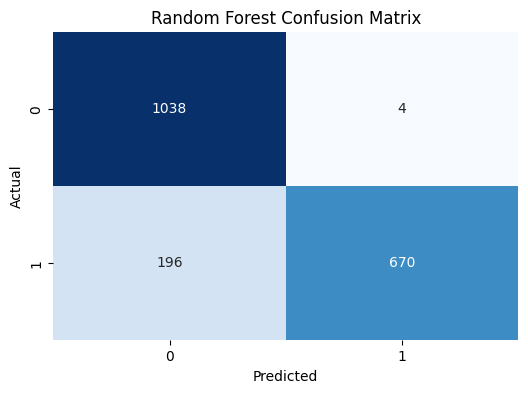

In [90]:
rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('random_forest_confusion_matrix.png') # Save the plot
plt.show()

# Models Comparaison

,Accuracy,Precision,Recall,F1-score
Model,,,,
Logistic Regression,0.747904,0.747112,0.672055,0.707599
KNN,0.515723,0.465060,0.445727,0.455189
SVM,0.551887,0.641026,0.028868,0.055249
Decision Tree Tuned,0.888365,0.986587,0.764434,0.861418
Random Forest,0.895178,0.994065,0.773672,0.870130


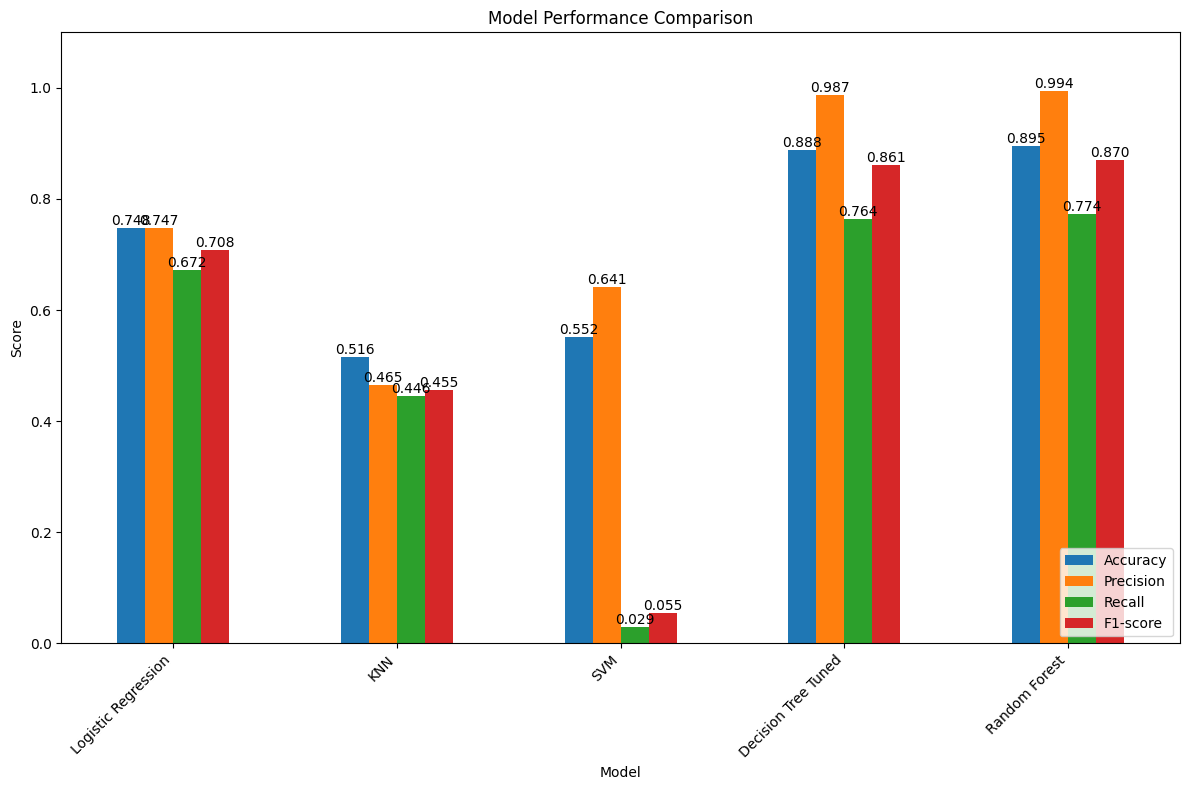

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

models = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Tuned', 'Random Forest'] # Updated label for clarity
accuracy_scores = [accuracy_score(y_test, log_reg_pred),
                   accuracy_score(y_test, knn_pred),
                   accuracy_score(y_test, svm_pred),
                   accuracy_score(y_test, dt_pred),
                   accuracy_score(y_test, rf_pred)]
precision_scores = [precision_score(y_test, log_reg_pred),
                    precision_score(y_test, knn_pred),
                    precision_score(y_test, svm_pred),
                    precision_score(y_test, dt_pred),
                    precision_score(y_test, rf_pred)]
recall_scores = [recall_score(y_test, log_reg_pred),
                 recall_score(y_test, knn_pred),
                 recall_score(y_test, svm_pred),
                 recall_score(y_test, dt_pred),
                 recall_score(y_test, rf_pred)] # Added recall for Random Forest
f1_scores = [f1_score(y_test, log_reg_pred),
             f1_score(y_test, knn_pred),
             f1_score(y_test, svm_pred),
             f1_score(y_test, dt_pred),
             f1_score(y_test, rf_pred)]

performance_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
})

performance_df.set_index('Model', inplace=True)
display(performance_df)

ax = performance_df.plot(kind='bar', figsize=(12, 8)) # Assigned to ax for annotations
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.ylim(0, 1.1) # Adjusting ylim for better visibility of annotations
plt.tight_layout()

# Add numbers to the bars in the comparison plot
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge') # Added annotations

plt.savefig('model_performance_comparison.png') # Save the plot
plt.show()

## ROC Curves and AUC

SVM model does not have predict_proba method. Cannot plot ROC curve.


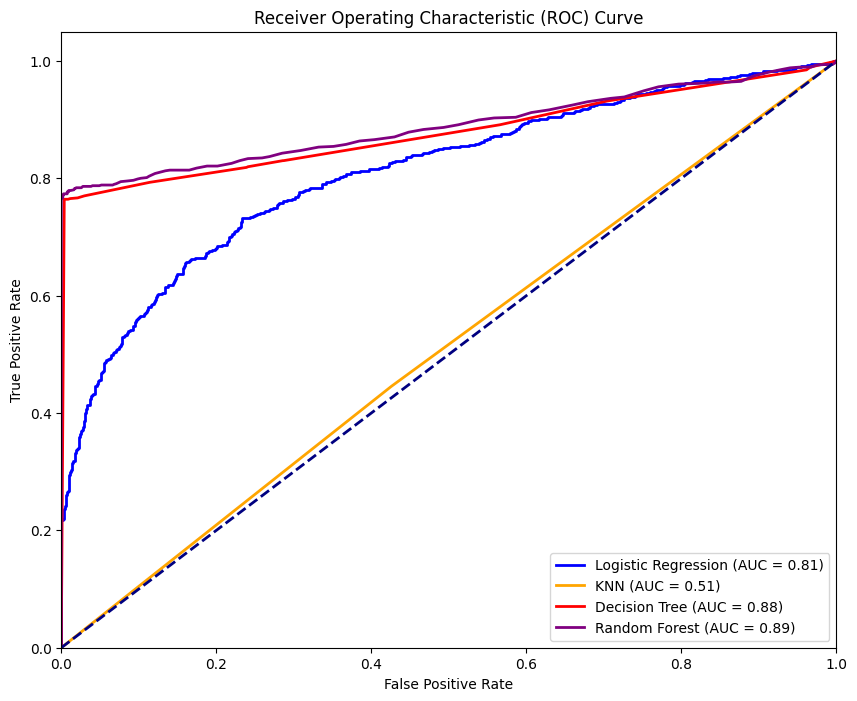

In [99]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (attack detected)
# For models that have predict_proba (Logistic Regression, Decision Tree, Random Forest)
# SVM does not have predict_proba by default, need probability=True during training

# Logistic Regression
if hasattr(best_log_reg_model, 'predict_proba'):
    log_reg_probs = best_log_reg_model.predict_proba(X_test)[:, 1]
    fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, log_reg_probs)
    auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
else:
    log_reg_probs = None
    auc_log_reg = None


# KNN
if hasattr(best_knn_model, 'predict_proba'):
    knn_probs = best_knn_model.predict_proba(X_test)[:, 1]
    fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_probs)
    auc_knn = auc(fpr_knn, tpr_knn)
else:
     knn_probs = None
     auc_knn = None

#SVM
if hasattr(svm_model, 'predict_proba'):
    try:
        svm_probs =svm_model.predict_proba(X_test)[:, 1]
        fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_probs)
        auc_svm = auc(fpr_svm, tpr_svm)
    except AttributeError:
        svm_probs = None
        auc_svm = None
        print("SVM model was not trained with probability=True. Cannot plot ROC curve.")
else:
    svm_probs = None
    auc_svm = None
    print("SVM model does not have predict_proba method. Cannot plot ROC curve.")


# Decision Tree
if hasattr(best_dt_model, 'predict_proba'):
    dt_probs = best_dt_model.predict_proba(X_test)[:, 1]
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)
    auc_dt = auc(fpr_dt, tpr_dt)
else:
    dt_probs = None
    auc_dt = None


# Random Forest
if hasattr(best_rf_model, 'predict_proba'):
    rf_probs = best_rf_model.predict_proba(X_test)[:, 1]
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_probs)
    auc_rf = auc(fpr_rf, tpr_rf)
else:
    rf_probs = None
    auc_rf = None


# Plot ROC curves
plt.figure(figsize=(10, 8))

if log_reg_probs is not None:
    plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')

if knn_probs is not None:
     plt.plot(fpr_knn, tpr_knn, color='orange', lw=2, label=f'KNN (AUC = {auc_knn:.2f})')

if svm_probs is not None:
    plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'SVM (AUC = {auc_svm:.2f})')

if dt_probs is not None:
    plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'Decision Tree (AUC = {auc_dt:.2f})')

if rf_probs is not None:
    plt.plot(fpr_rf, tpr_rf, color='purple', lw=2, label=f'Random Forest (AUC = {auc_rf:.2f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('ROC.png') # Save the plot

plt.show()